### DiversiSmart - Portfolio Assesment

this notebook is used to asses the portfolio of a user and to give him a score based on the diversity of his portfolio. It will provide a number of graphs and tables to help the user understand his portfolio and how to improve it.

In [13]:
# Import the required libraries and dependencies
import gspread

import pandas as pd

import matplotlib.pyplot as plt

from pathlib import Path

%matplotlib inline

import numpy as np

import hvplot.pandas as hv


In [14]:
# Use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']


gc = gspread.oauth()



In [15]:
# Open the spreadsheet
spreadsheet = gc.open("Stock Portfolio - Fawaz")

# Specify the worksheet to be used
worksheet = spreadsheet.worksheet("AAPL")

# Get all values from the worksheet
data = worksheet.get_all_values()[1:]


RefreshError: ('invalid_grant: Token has been expired or revoked.', {'error': 'invalid_grant', 'error_description': 'Token has been expired or revoked.'})

In [ ]:
print(data)

data_2 = worksheet.col_values(2)[2:]

print(data_2)


[['Date', 'Close'], ['2/1/2023 16:00:00', '145.43'], ['2/2/2023 16:00:00', '150.82'], ['2/3/2023 16:00:00', '154.5'], ['2/6/2023 16:00:00', '151.73'], ['2/7/2023 16:00:00', '154.65'], ['2/8/2023 16:00:00', '151.92'], ['2/9/2023 16:00:00', '150.87'], ['2/10/2023 16:00:00', '151.01'], ['2/13/2023 16:00:00', '153.85'], ['2/14/2023 16:00:00', '153.2'], ['2/15/2023 16:00:00', '155.33'], ['2/16/2023 16:00:00', '153.71'], ['2/17/2023 16:00:00', '152.55'], ['2/21/2023 16:00:00', '148.48'], ['2/22/2023 16:00:00', '148.91'], ['2/23/2023 16:00:00', '149.4'], ['2/24/2023 16:00:00', '146.71'], ['2/27/2023 16:00:00', '147.92'], ['2/28/2023 16:00:00', '147.41'], ['3/1/2023 16:00:00', '145.31'], ['3/2/2023 16:00:00', '145.91'], ['3/3/2023 16:00:00', '151.03'], ['3/6/2023 16:00:00', '153.83'], ['3/7/2023 16:00:00', '151.6'], ['3/8/2023 16:00:00', '152.87'], ['3/9/2023 16:00:00', '150.59'], ['3/10/2023 16:00:00', '148.5'], ['3/13/2023 16:00:00', '150.47'], ['3/14/2023 16:00:00', '152.59'], ['3/15/2023 1

,2/9/2023 16:00:00,150.87
0,2/9/2023 16:00:00,150.87
1,2/10/2023 16:00:00,151.01
2,2/13/2023 16:00:00,153.85
3,2/14/2023 16:00:00,153.2
4,2/15/2023 16:00:00,155.33


In [ ]:
# save the header row
header = data[0]

# save the 'Date' column
dates = [x[0] for x in data]

# remove the header row from the data
data = data[1:]
print(header)
# Iterate over the column values
for value in data_2:
    # Split the value using the comma as the delimiter
    split_values = value.split(',')

    # Print the split values
    print(split_values)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

df.head()



['2/8/2023 16:00:00', '151.92']
['145.43']
['150.82']
['154.5']
['151.73']
['154.65']
['151.92']
['150.87']
['151.01']
['153.85']
['153.2']
['155.33']
['153.71']
['152.55']
['148.48']
['148.91']
['149.4']
['146.71']
['147.92']
['147.41']
['145.31']
['145.91']
['151.03']
['153.83']
['151.6']
['152.87']
['150.59']
['148.5']
['150.47']
['152.59']
['152.99']
['155.85']
['155']
['157.4']
['159.28']
['157.83']
['158.93']
['160.25']
['158.28']
['157.65']
['160.77']
['162.36']
['164.9']
['166.17']
['165.63']
['163.76']
['164.66']
['162.03']
['160.8']
['160.1']
['165.56']
['165.21']
['165.23']
['166.47']
['167.63']
['166.65']
['165.02']
['165.33']
['163.77']
['163.76']
['168.41']
['169.68']
['169.59']
['168.54']
['167.45']
['165.79']
['173.57']
['173.5']
['171.77']
['173.56']
['173.75']
['172.57']
['172.07']
['172.07']
['172.69']
['175.05']
['175.16']
['174.2']
['171.56']
['171.84']
['172.99']
['175.43']
['177.3']
['177.25']
['180.09']
['180.95']
['179.58']
['179.21']
['177.82']
['180.57']
['18

,2/9/2023 16:00:00,150.87
0,2/10/2023 16:00:00,151.01
1,2/13/2023 16:00:00,153.85
2,2/14/2023 16:00:00,153.2
3,2/15/2023 16:00:00,155.33
4,2/16/2023 16:00:00,153.71


In [ ]:
# Create the larger dataframe, with all the stocks in the portfolio
worksheet = spreadsheet.worksheet("Portfolio")

# Get the ticker values from the worksheet
symbol_column = worksheet.col_values(2)[2:]

dfs = []

print(symbol_column)


['AAPL', 'MSFT', 'TSLA', 'WM', 'RSG', 'CNR', 'ECL', 'WCN', 'NVDA']


In [ ]:
for symbol in symbol_column:
    worksheet = spreadsheet.worksheet(symbol)
    
    # Fetch the closing data for the ticker
    data = worksheet.get_all_values()  # Exclude the header row
    
    # Convert the data to a DataFrame
    df = pd.DataFrame(data)
    # df.set_index("Date", inplace=True)
    # df.index = pd.to_datetime(df.index)  # Convert index to datetime
    
    dfs.append(df)

In [ ]:
print(dfs)

[                      0       1
0            Apple Inc.        
1                  Date   Close
2     2/1/2023 16:00:00  145.43
3     2/2/2023 16:00:00  150.82
4     2/3/2023 16:00:00   154.5
..                  ...     ...
110  7/10/2023 16:00:00  188.61
111  7/11/2023 16:00:00  188.08
112  7/12/2023 16:00:00  189.77
113  7/13/2023 16:00:00  190.54
114  7/14/2023 16:00:00  190.69

[115 rows x 2 columns],                          0       1
0    Microsoft Corporation        
1                     Date   Close
2        2/1/2023 16:00:00  252.75
3        2/2/2023 16:00:00   264.6
4        2/3/2023 16:00:00  258.35
..                     ...     ...
110     7/10/2023 16:00:00  331.83
111     7/11/2023 16:00:00  332.47
112     7/12/2023 16:00:00   337.2
113     7/13/2023 16:00:00  342.66
114     7/14/2023 16:00:00  345.24

[115 rows x 2 columns],                       0       1
0           Tesla, Inc.        
1                  Date   Close
2     2/1/2023 16:00:00  181.41
3     2/2/2023 16

In [ ]:
# Concatenate all the dataframes, make sure the 
df = pd.concat(dfs, axis=1, join="inner")
df.head()

# Set the first two rows as the header
header = df.iloc[0]
df = df[1:]
df.columns = header
df.head()

# Drop the header column row from the dataframe
df_2 = df.drop(df.columns[0], axis=1)

display(df_2.head())
# save the values of the second column
dates = df.iloc[:, 2]
display(dates.head())
# move the column headers to the right one column
df = df.shift(-1, axis=1)

# Set the index_col parameter to the second column
date_col = dates
df.set_index(date_col, inplace=True)
# delete all columns that contain a value of str 'Date'
df = df.loc[:, ~df.columns.str.contains('Date')]

display(df.head())

# delete duplicate columns
df = df.loc[:,~df.columns.duplicated()]

df.index.name = None


# drop the third column
df = df.drop(df.columns[1], axis=1)

# name the index column as 'Date'
df.index.name = str('Date')

df.head()

df.head()

# save the df dataframe as portfolio
portfolio_df = df.to_csv('portfolio.csv')



,,Microsoft Corporation,,"Tesla, Inc.",,"Waste Management, Inc.",,"Republic Services, Inc.",,Canadian National Railway,,Ecolab Inc,,"Waste Connections, Inc.",,NVIDIA Corp,
1,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close
2,145.43,2/1/2023 16:00:00,252.75,2/1/2023 16:00:00,181.41,2/1/2023 16:00:00,154.41,2/1/2023 16:00:00,124.79,2/1/2023 16:30:00,17.5,2/1/2023 16:00:00,155.73,2/1/2023 16:00:00,133.02,2/1/2023 16:00:00,145.43
3,150.82,2/2/2023 16:00:00,264.6,2/2/2023 16:00:00,188.27,2/2/2023 16:00:00,150.34,2/2/2023 16:00:00,122.54,2/2/2023 16:30:00,17.25,2/2/2023 16:00:00,159.32,2/2/2023 16:00:00,131.97,2/2/2023 16:00:00,150.82
4,154.5,2/3/2023 16:00:00,258.35,2/3/2023 16:00:00,189.98,2/3/2023 16:00:00,151.06,2/3/2023 16:00:00,123.08,2/3/2023 16:30:00,17.25,2/3/2023 16:00:00,153.29,2/3/2023 16:00:00,132.23,2/3/2023 16:00:00,154.5
5,151.73,2/6/2023 16:00:00,256.77,2/6/2023 16:00:00,194.76,2/6/2023 16:00:00,151.82,2/6/2023 16:00:00,123.89,2/6/2023 16:30:00,17.25,2/6/2023 16:00:00,151.69,2/6/2023 16:00:00,132.93,2/6/2023 16:00:00,151.73


1                 Date
2    2/1/2023 16:00:00
3    2/2/2023 16:00:00
4    2/3/2023 16:00:00
5    2/6/2023 16:00:00
Name: Microsoft Corporation, dtype: object

,Apple Inc.,,Microsoft Corporation,,"Tesla, Inc.",,"Waste Management, Inc.",,"Republic Services, Inc.",,Canadian National Railway,,Ecolab Inc,,"Waste Connections, Inc.",,NVIDIA Corp,
Microsoft Corporation,,,,,,,,,,,,,,,,,,
Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,None
2/1/2023 16:00:00,145.43,2/1/2023 16:00:00,252.75,2/1/2023 16:00:00,181.41,2/1/2023 16:00:00,154.41,2/1/2023 16:00:00,124.79,2/1/2023 16:30:00,17.5,2/1/2023 16:00:00,155.73,2/1/2023 16:00:00,133.02,2/1/2023 16:00:00,145.43,None
2/2/2023 16:00:00,150.82,2/2/2023 16:00:00,264.6,2/2/2023 16:00:00,188.27,2/2/2023 16:00:00,150.34,2/2/2023 16:00:00,122.54,2/2/2023 16:30:00,17.25,2/2/2023 16:00:00,159.32,2/2/2023 16:00:00,131.97,2/2/2023 16:00:00,150.82,None
2/3/2023 16:00:00,154.5,2/3/2023 16:00:00,258.35,2/3/2023 16:00:00,189.98,2/3/2023 16:00:00,151.06,2/3/2023 16:00:00,123.08,2/3/2023 16:30:00,17.25,2/3/2023 16:00:00,153.29,2/3/2023 16:00:00,132.23,2/3/2023 16:00:00,154.5,None
2/6/2023 16:00:00,151.73,2/6/2023 16:00:00,256.77,2/6/2023 16:00:00,194.76,2/6/2023 16:00:00,151.82,2/6/2023 16:00:00,123.89,2/6/2023 16:30:00,17.25,2/6/2023 16:00:00,151.69,2/6/2023 16:00:00,132.93,2/6/2023 16:00:00,151.73,None


In [ ]:
# Read the portfolio csv file
portfolio_df = pd.read_csv('portfolio.csv',
                           index_col='Date',
                           parse_dates=True,
                           infer_datetime_format=True)


# Drop the first row
portfolio_df = portfolio_df.drop(portfolio_df.index[0])

portfolio_df.head()


,Apple Inc.,Microsoft Corporation,"Tesla, Inc.","Waste Management, Inc.","Republic Services, Inc.",Canadian National Railway,Ecolab Inc,"Waste Connections, Inc.",NVIDIA Corp
Date,,,,,,,,,
2/1/2023 16:00:00,145.43,252.75,181.41,154.41,124.79,17.5,155.73,133.02,145.43
2/2/2023 16:00:00,150.82,264.6,188.27,150.34,122.54,17.25,159.32,131.97,150.82
2/3/2023 16:00:00,154.5,258.35,189.98,151.06,123.08,17.25,153.29,132.23,154.5
2/6/2023 16:00:00,151.73,256.77,194.76,151.82,123.89,17.25,151.69,132.93,151.73
2/7/2023 16:00:00,154.65,267.56,196.81,151.33,124.29,17.13,152.29,133.37,154.65


In [16]:
# Check dtypes
portfolio_df.dtypes

# Convert the dtypes of the dataframe to float
portfolio_df = portfolio_df.astype(float)

headers = portfolio_df.columns
display(headers)

Index(['Apple Inc.', 'Microsoft Corporation', 'Tesla, Inc.',
       'Waste Management, Inc.', 'Republic Services, Inc.',
       'Canadian National Railway', 'Ecolab Inc', 'Waste Connections, Inc.',
       'NVIDIA Corp'],
      dtype='object')

In [17]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
daily_returns_df = portfolio_df.dropna(axis=0, how='all')

daily_returns_df = portfolio_df.pct_change().dropna()

daily_returns_df.head()

,Apple Inc.,Microsoft Corporation,"Tesla, Inc.","Waste Management, Inc.","Republic Services, Inc.",Canadian National Railway,Ecolab Inc,"Waste Connections, Inc.",NVIDIA Corp
Date,,,,,,,,,
2/2/2023 16:00:00,0.037063,0.046884,0.037815,-0.026358,-0.018030,-0.014286,0.023053,-0.007894,0.037063
2/3/2023 16:00:00,0.024400,-0.023621,0.009083,0.004789,0.004407,0.000000,-0.037848,0.001970,0.024400
2/6/2023 16:00:00,-0.017929,-0.006116,0.025161,0.005031,0.006581,0.000000,-0.010438,0.005294,-0.017929
2/7/2023 16:00:00,0.019245,0.042022,0.010526,-0.003228,0.003229,-0.006957,0.003955,0.003310,0.019245
2/8/2023 16:00:00,-0.017653,-0.003102,0.022763,-0.003106,0.001046,-0.022183,-0.007026,0.000750,-0.017653


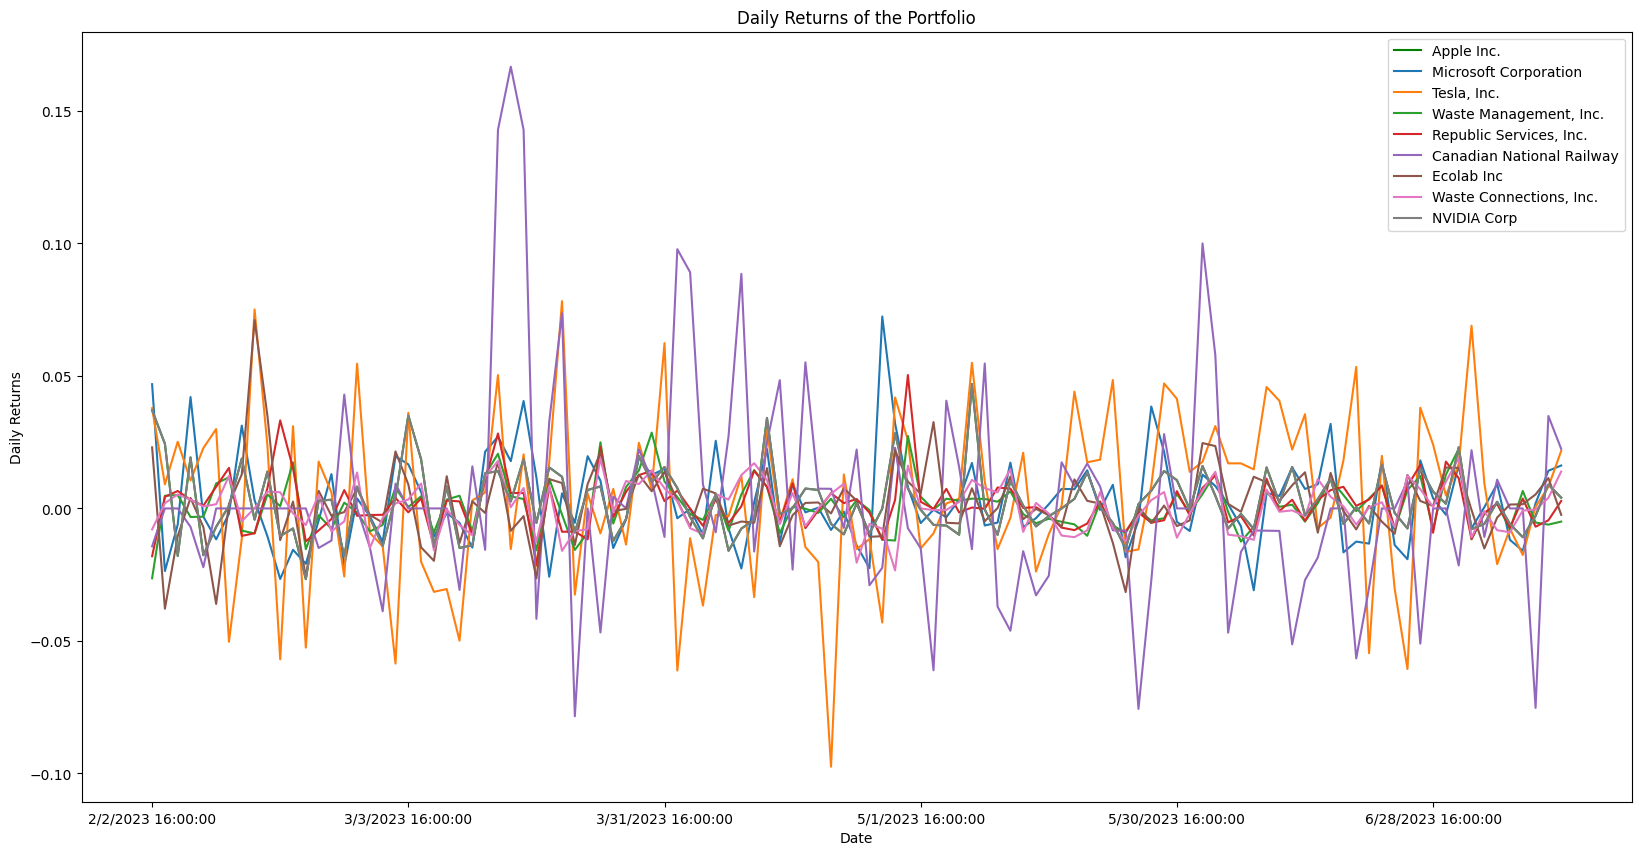

In [18]:
# Plot the daily returns of the portfolio
ax = daily_returns_df[headers[0]].plot(color='green', figsize=(20,10), label='Apple Inc.', title='Daily Returns of the Portfolio', legend=True, kind='line')
for header in headers[1:]:
    daily_returns_df[header].plot( figsize=(20,10), label=header, legend=True, kind='line', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Returns')
plt.show()




,Apple Inc.,Microsoft Corporation,"Tesla, Inc.","Waste Management, Inc.","Republic Services, Inc.",Canadian National Railway,Ecolab Inc,"Waste Connections, Inc.",NVIDIA Corp
Date,,,,,,,,,
2/2/2023 16:00:00,1.037063,1.046884,1.037815,0.973642,0.981970,0.985714,1.023053,0.992106,1.037063
2/3/2023 16:00:00,1.062367,1.022156,1.047241,0.978305,0.986297,0.985714,0.984332,0.994061,1.062367
2/6/2023 16:00:00,1.043320,1.015905,1.073590,0.983226,0.992788,0.985714,0.974058,0.999323,1.043320
2/7/2023 16:00:00,1.063398,1.058595,1.084891,0.980053,0.995993,0.978857,0.977910,1.002631,1.063398
2/8/2023 16:00:00,1.044626,1.055312,1.109586,0.977009,0.997035,0.957143,0.971040,1.003383,1.044626


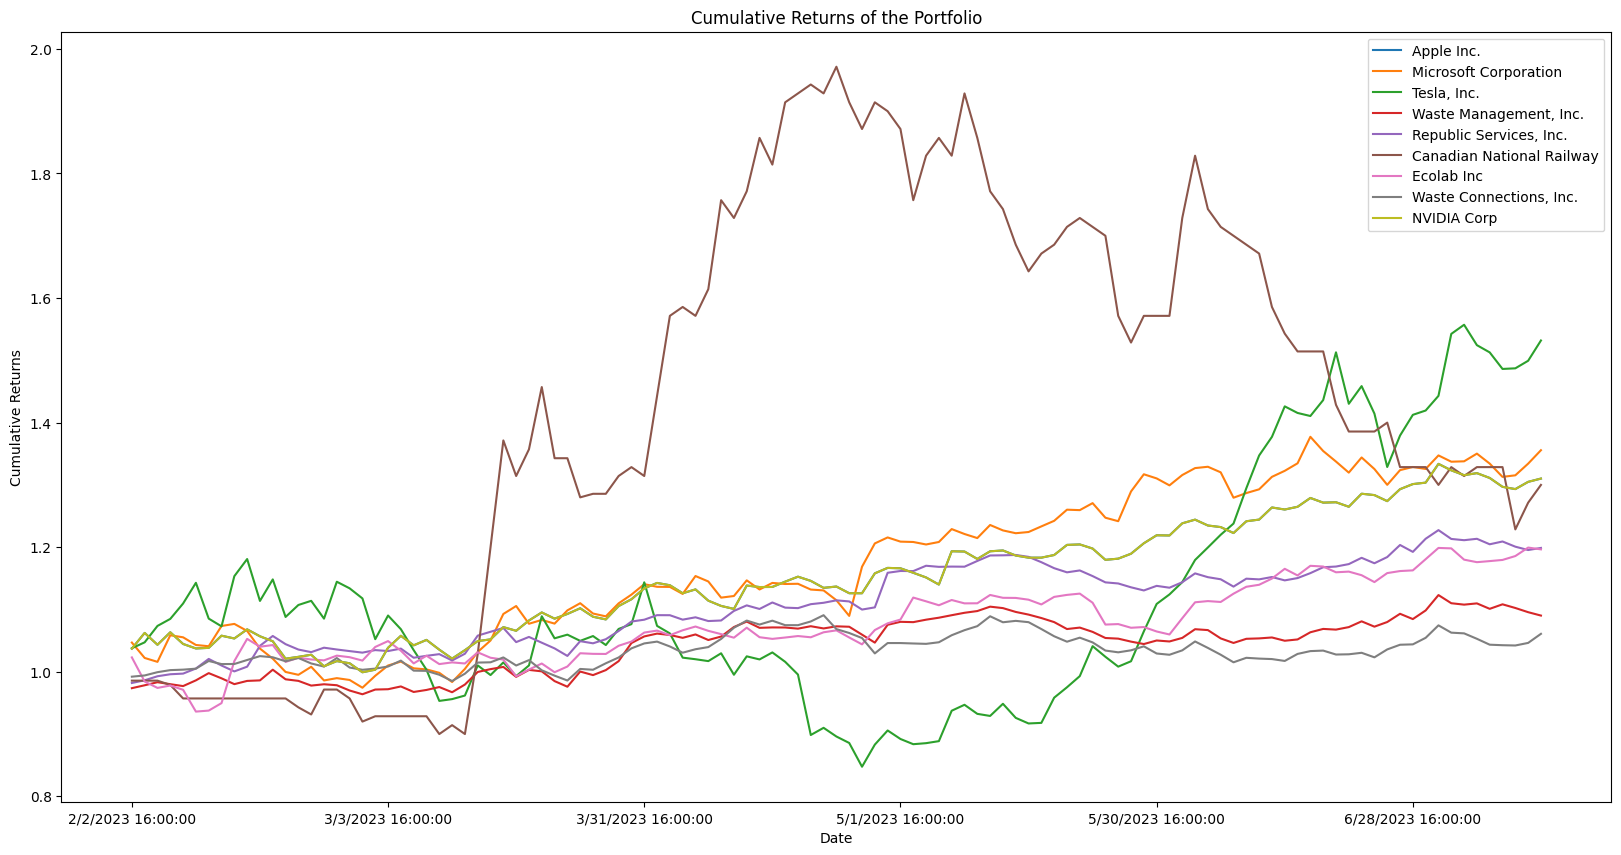

In [19]:
# Calculate and plot the cumulative returns of the portfolio
cumulative_returns = (1 + daily_returns_df).cumprod() 

cumulative_returns.columns = headers
display(cumulative_returns.head())

ax = cumulative_returns.plot(figsize=(20,10), title='Cumulative Returns of the Portfolio', legend=True, kind='line')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')
plt.show()





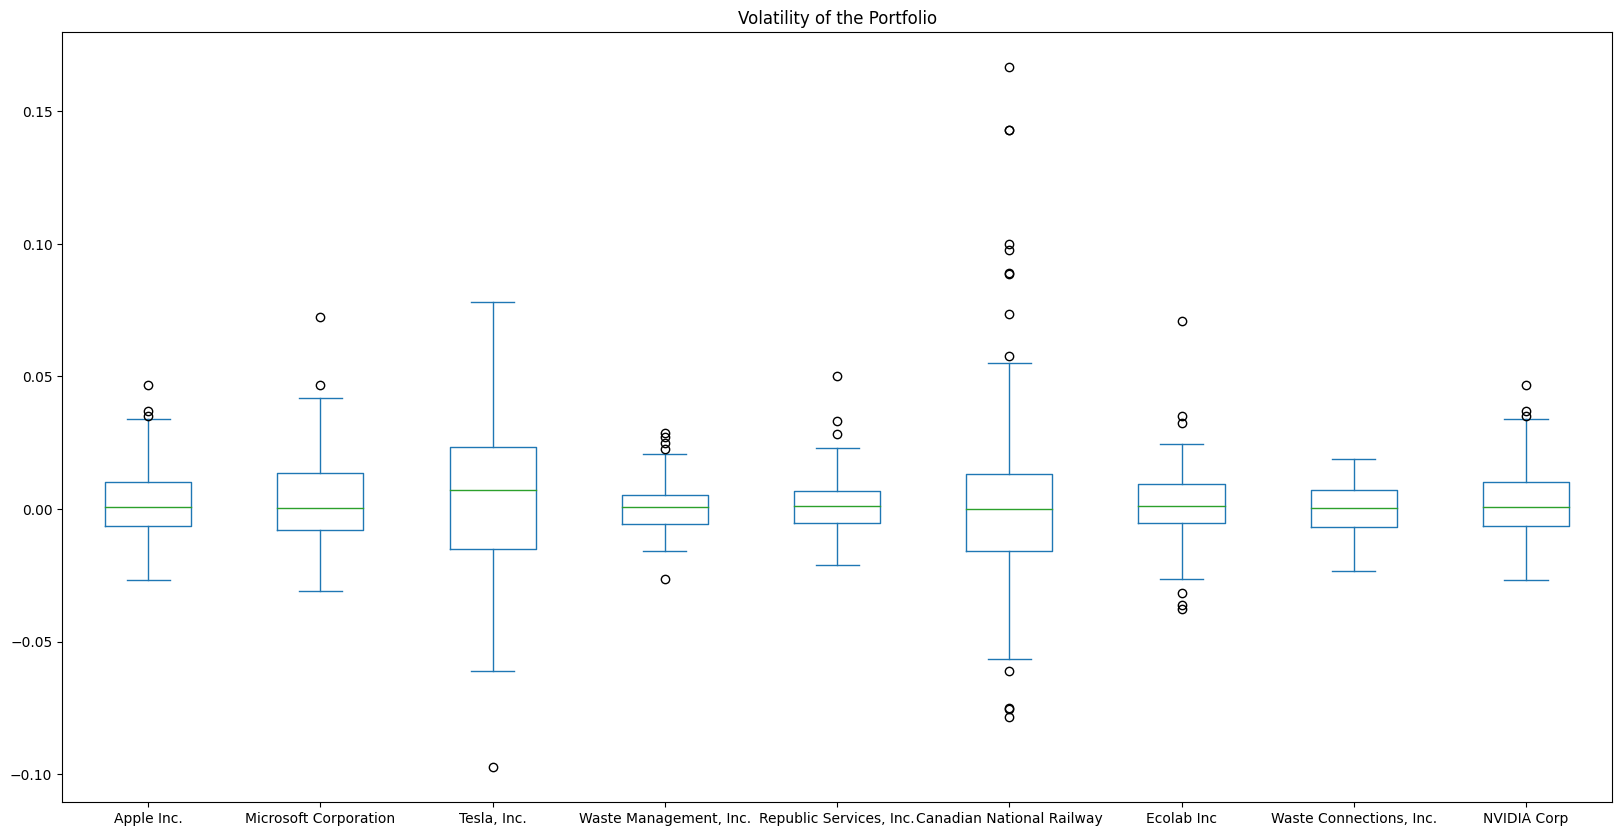

<Figure size 640x480 with 0 Axes>

In [22]:
# Volatility of the portfolio
daily_returns_df.plot(kind='box', figsize=(20,10), title='Volatility of the Portfolio')
plt.show()

plt.savefig('volatility.png')



# Using an Efficiency Frontier, find the optimal portfolio weight for a given risk level

We will use the Efficient Frontier to find the optimal portfolio weight for a given risk level. The Efficient Frontier is a set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal because they have a higher level of risk for the defined rate of return.


In [23]:
# Lof of percentage change of the portfolio
log_pct_change = portfolio_df.pct_change().apply(lambda x: np.log(1+x))
log_pct_change = log_pct_change.dropna(axis=0, how='all')
log_pct_change.head()


,Apple Inc.,Microsoft Corporation,"Tesla, Inc.","Waste Management, Inc.","Republic Services, Inc.",Canadian National Railway,Ecolab Inc,"Waste Connections, Inc.",NVIDIA Corp
Date,,,,,,,,,
2/2/2023 16:00:00,0.036392,0.045818,0.037117,-0.026712,-0.018195,-0.014389,0.022791,-0.007925,0.036392
2/3/2023 16:00:00,0.024107,-0.023904,0.009042,0.004778,0.004397,0.000000,-0.038583,0.001968,0.024107
2/6/2023 16:00:00,-0.018091,-0.006135,0.024849,0.005018,0.006560,0.000000,-0.010493,0.005280,-0.018091
2/7/2023 16:00:00,0.019062,0.041163,0.010471,-0.003233,0.003223,-0.006981,0.003948,0.003305,0.019062
2/8/2023 16:00:00,-0.017810,-0.003107,0.022508,-0.003111,0.001045,-0.022433,-0.007051,0.000750,-0.017810


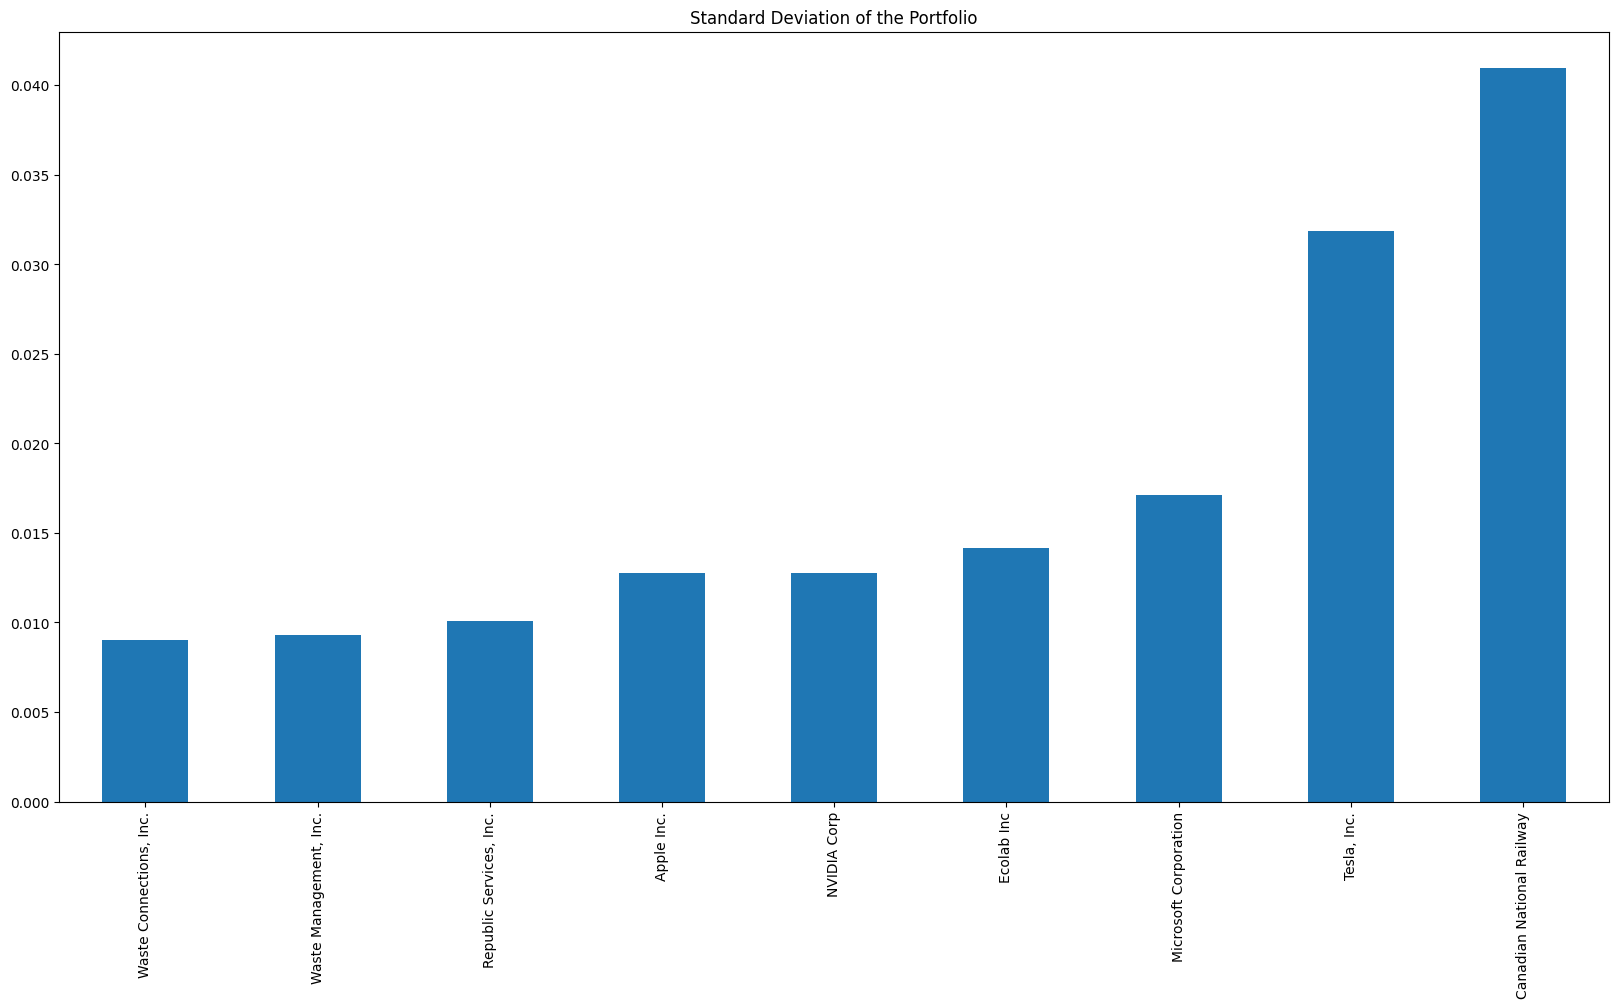

Waste Connections, Inc.    0.009017
Waste Management, Inc.     0.009275
Republic Services, Inc.    0.010082
Apple Inc.                 0.012755
NVIDIA Corp                0.012755
dtype: float64

In [24]:
# Calculate and sort the stocks based on the standard deviation
portfolio_std = daily_returns_df.std()
portfolio_std.sort_values(inplace=True)

# Plot the standard deviation of the portfolio
portfolio_std.plot(kind='bar', figsize=(20,10), title='Standard Deviation of the Portfolio')

plt.show()

portfolio_std.head()


In [25]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
trading_days = 252
annualized_std = portfolio_std * np.sqrt(trading_days)
annualized_std.sort_values()


Waste Connections, Inc.      0.143147
Waste Management, Inc.       0.147236
Republic Services, Inc.      0.160047
Apple Inc.                   0.202487
NVIDIA Corp                  0.202487
Ecolab Inc                   0.224572
Microsoft Corporation        0.271893
Tesla, Inc.                  0.505436
Canadian National Railway    0.649994
dtype: float64

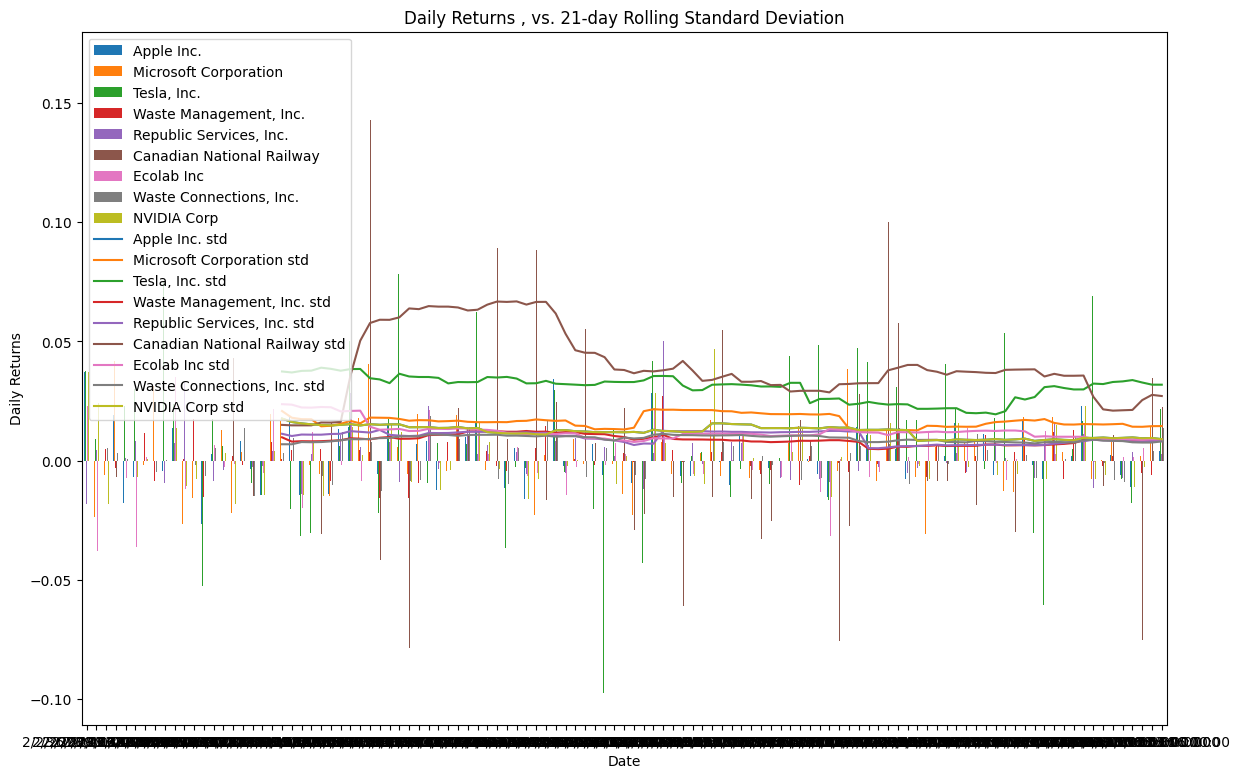

In [26]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
ax = daily_returns_df.plot(kind='bar',figsize=(14,9), title="Daily Returns , vs. 21-day Rolling Standard Deviation")
for header in headers:
    daily_returns_df[header].rolling(window=21).std().plot(ax=ax, label=f"{header} std", legend=True, kind='line')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Returns')

plt.show()


In [27]:
import hvplot.pandas

# Calculate rolling standard deviation for each column
rolling_std = daily_returns_df.rolling(window=21).std()

# Create a plot using hvplot
plot = rolling_std.hvplot(width=700, height=500, title="Rolling Standard Deviation of Portfolios and S&P 500", xlabel='Date', ylabel='Standard Deviation', legend='top_left', rot=90, shared_axes=False)

# Show the plot
hvplot.show(plot)
display(plot)

Launching server at http://localhost:58916


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [28]:
import pandas as pd
import hvplot.pandas
import holoviews as hv

# Define the headers (assuming you have a list of headers)
headings = ['Portfolio 1', 'Portfolio 2', 'Portfolio 3', 'S&P 500']

# Create a list to store the plots
plots = []

# Iterate over each header
for header in headers:
    # Create a DataFrame with the daily returns and rolling standard deviation
    df = pd.DataFrame({
        'Daily Returns': daily_returns_df[header],
        'Rolling Std': daily_returns_df[header].rolling(window=21).std()
    })
    
    # Create an interactive plot for the DataFrame using hvplot
    plot = df.hvplot(x='Date', ylabel='Value', shared_axes=False)

    # set the title
    plot = plot.opts(title=header)
    
    # Add the plot to the list of plots
    plots.append(plot)

# Create a layout combining all the plots
layout = hv.Layout(plots).cols(2)

# Show the layout
layout

:Layout
   .NdOverlay.I    :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .NdOverlay.II   :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .NdOverlay.III  :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .NdOverlay.IV   :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .NdOverlay.V    :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .NdOverlay.VI   :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .NdOverlay.VII  :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .NdOverlay.VIII :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .NdOverlay.IX   :NdOverlay   [Variable]
      :Curve   [Date]   (value)

## Key Metrics:

1. Average Annual Return

2. Annualized Sharpe Ratio

3. Annualized Volatility

4. Covariance

5. Beta 



In [29]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
trading_days = 252

annual_average_returns = daily_returns_df.mean() * trading_days

annual_average_returns.sort_values(inplace=True)

display(annual_average_returns)

Waste Connections, Inc.      0.144388
Waste Management, Inc.       0.206875
Republic Services, Inc.      0.424576
Ecolab Inc                   0.432391
Apple Inc.                   0.634245
NVIDIA Corp                  0.634245
Microsoft Corporation        0.728065
Canadian National Railway    0.797959
Tesla, Inc.                  1.097086
dtype: float64

<Axes: title={'center': 'Annual Average Returns of the Portfolio'}>

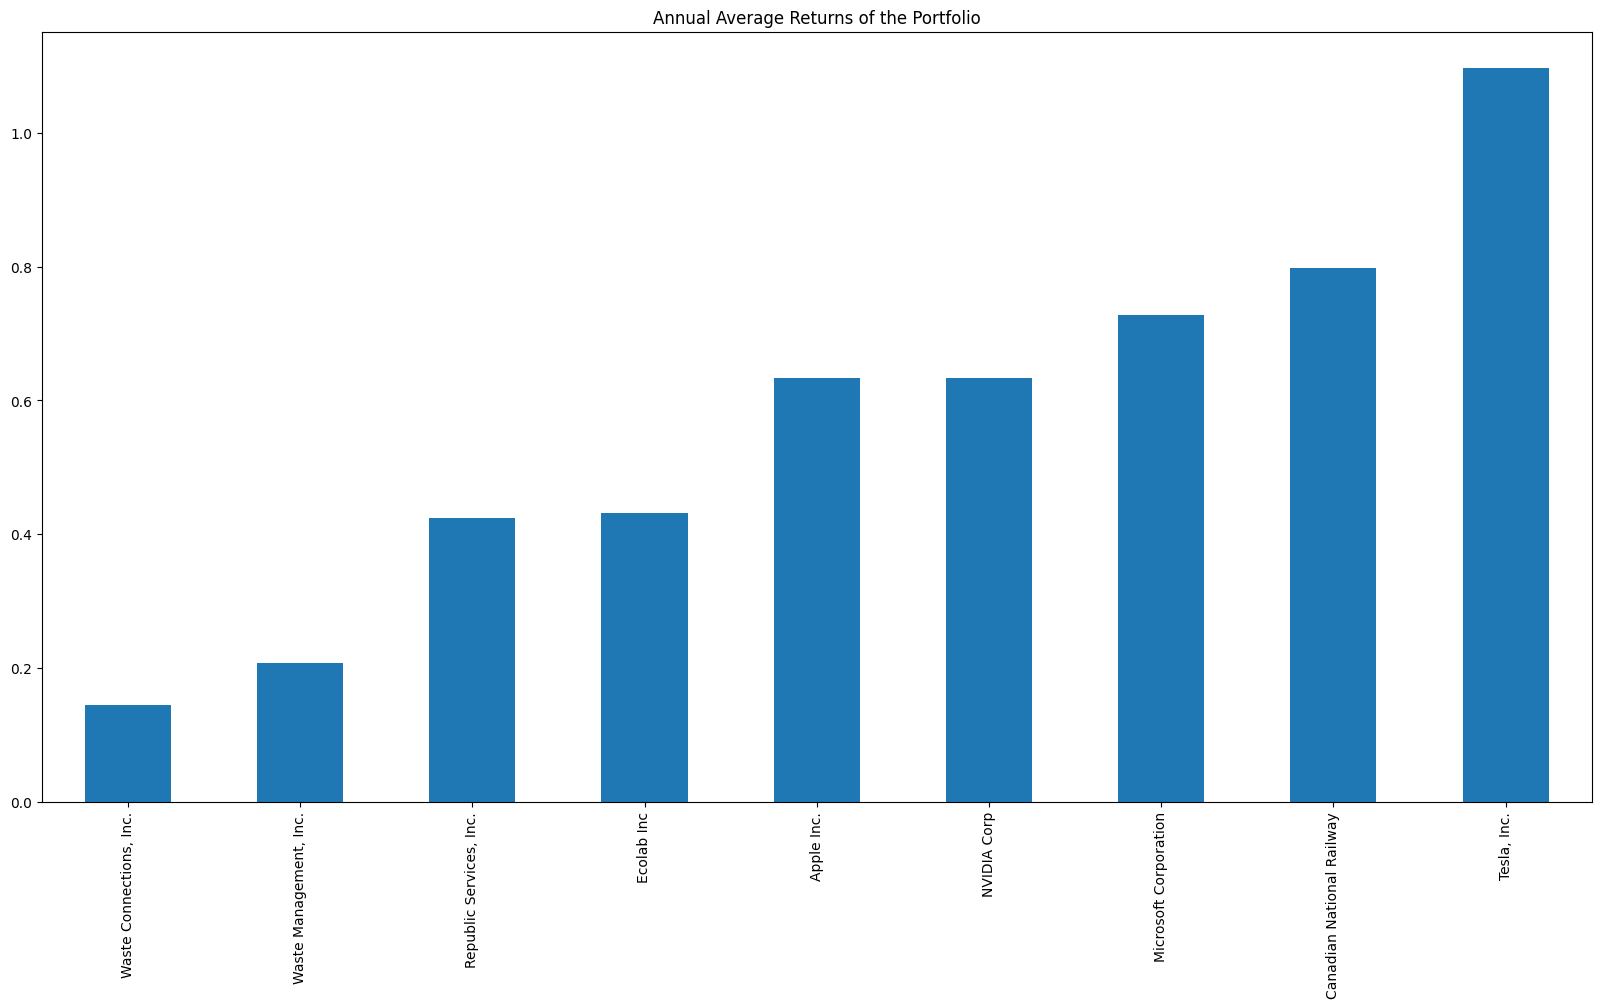

In [32]:
# Plot the annual average returns using hvplot
annual_average_returns.plot(kind='bar', figsize=(20,10), title='Annual Average Returns of the Portfolio')



Apple Inc.                   2.874728
NVIDIA Corp                  2.874728
Microsoft Corporation        2.485961
Republic Services, Inc.      2.326977
Tesla, Inc.                  2.067394
Ecolab Inc                   1.693183
Canadian National Railway    1.147409
Waste Management, Inc.       1.050860
Waste Connections, Inc.      0.644358
dtype: float64

<Axes: title={'center': 'Sharpe Ratios of the Portfolio'}>

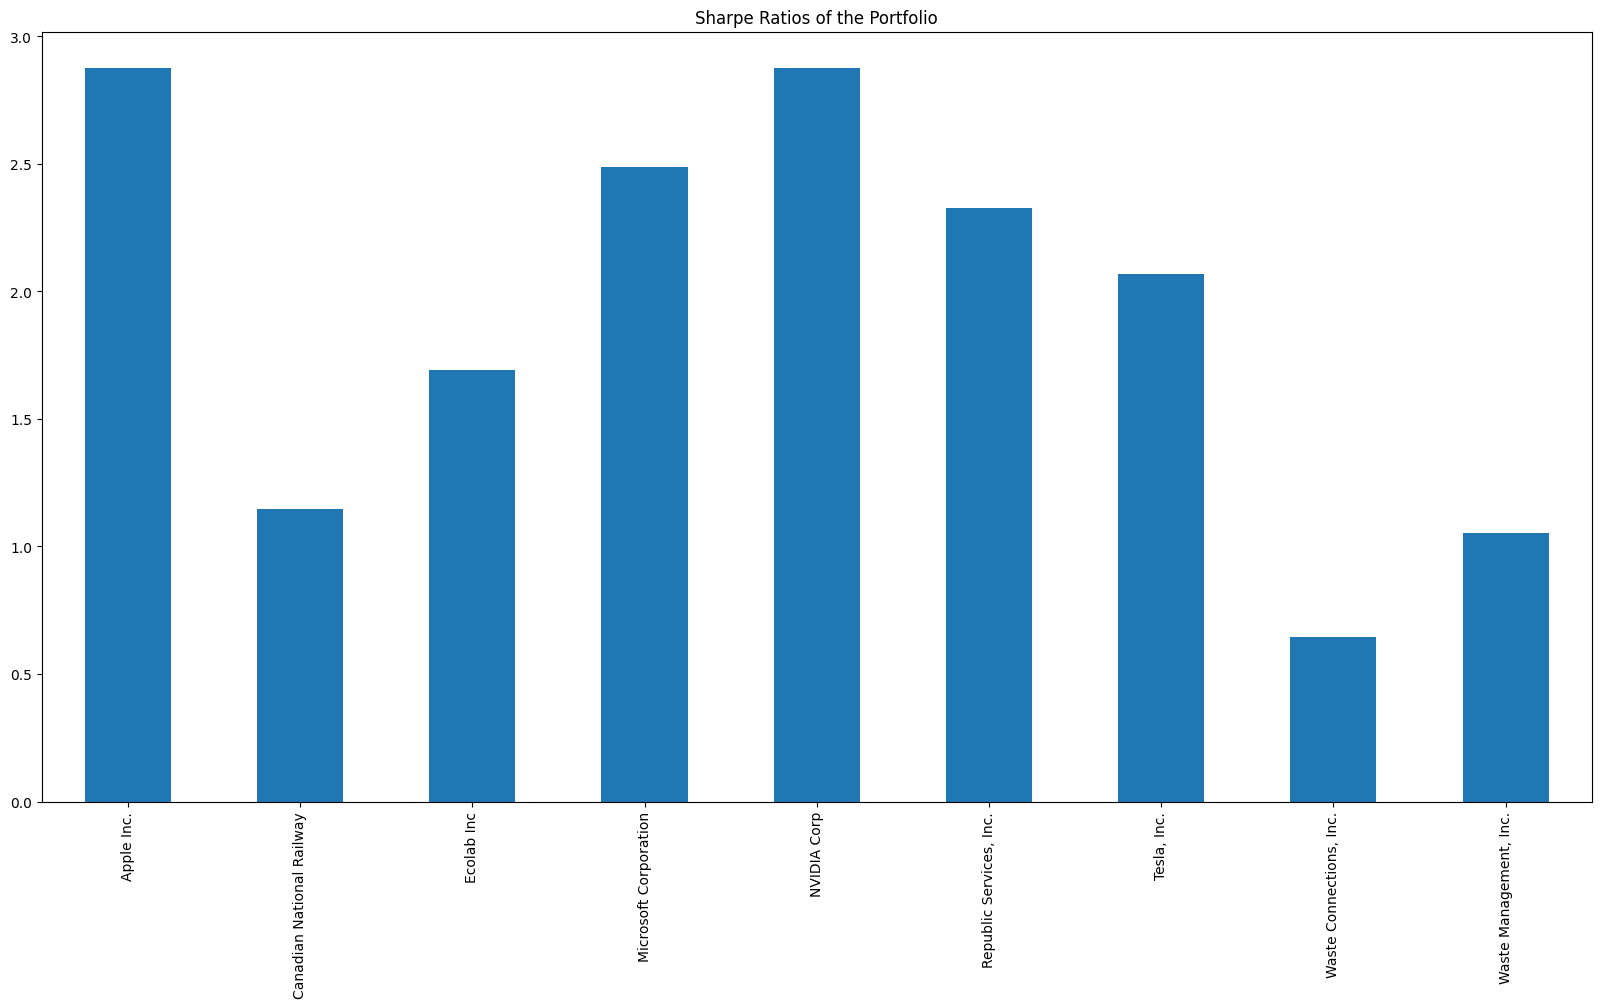

In [36]:
# Calculate and plot the sharpe ratios
# first, load the live risk-free rate using yfinance
import yfinance as yf

risk_free_rate = yf.Ticker('^IRX').history(period='max')['Close'][-1] / 100

sharpe_ratios = (annual_average_returns - risk_free_rate) / annualized_std

# Display the sharpe ratios in descending order
display(sharpe_ratios.sort_values(ascending=False))

# Plot the sharpe ratios
sharpe_ratios.plot(kind='bar', figsize=(20,10), title='Sharpe Ratios of the Portfolio')




<Axes: title={'center': 'Sortino Ratios of the Portfolio'}>

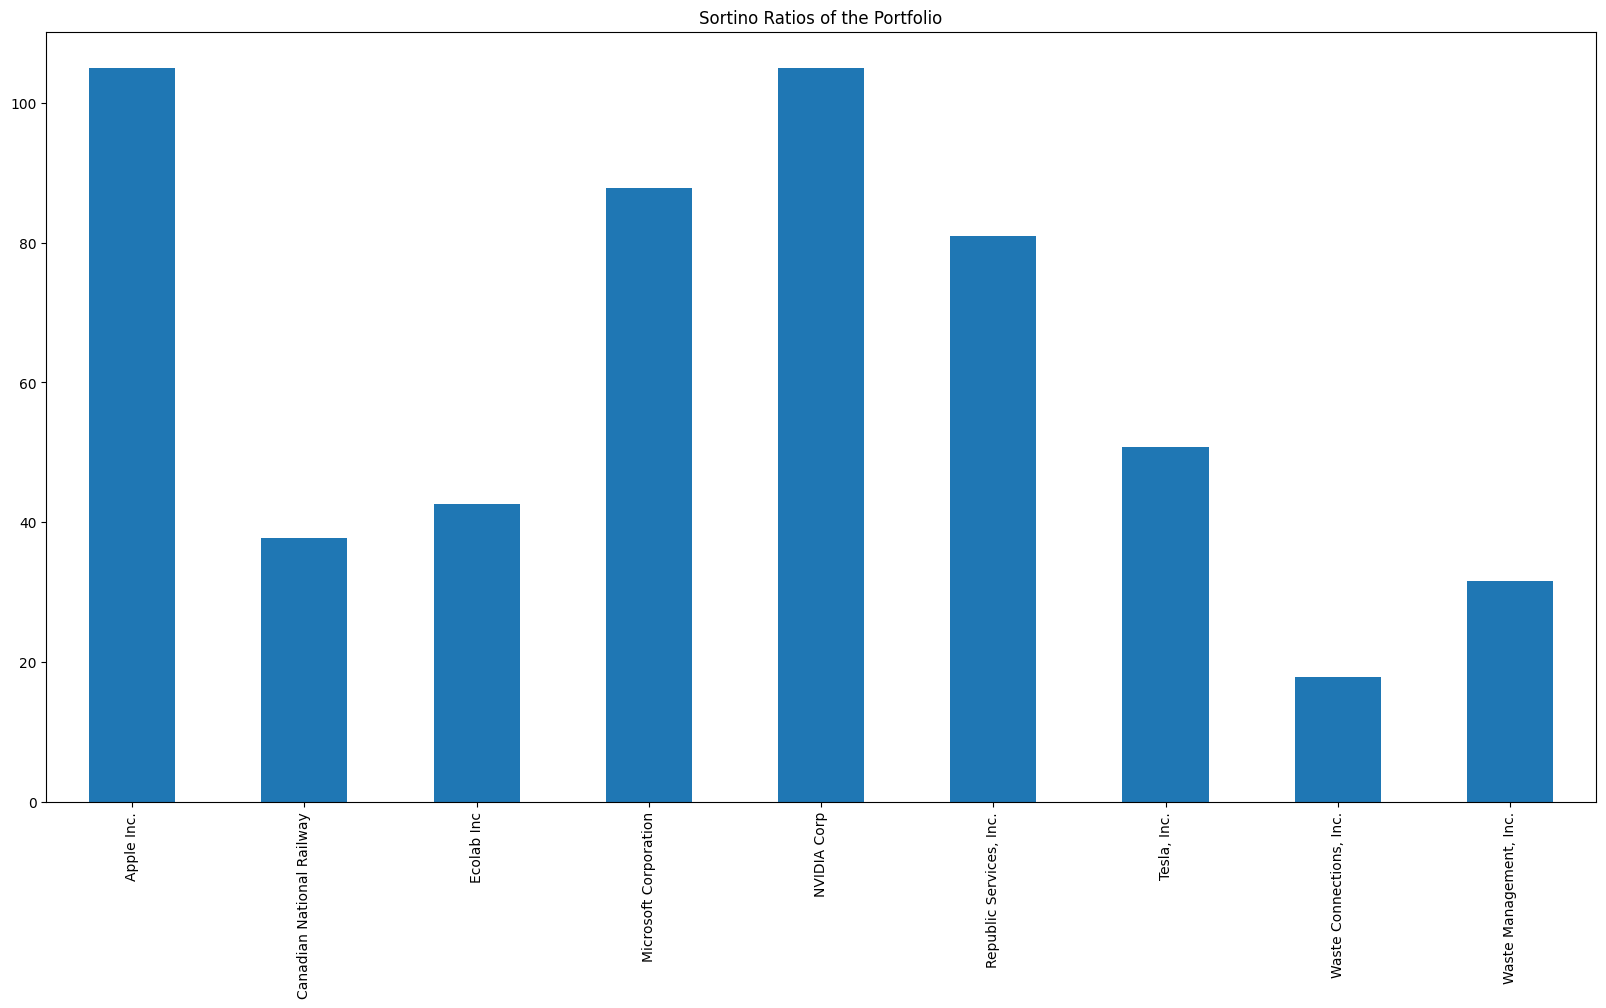

In [38]:
# Calculate the Sortino Ratio aswell as the Calmar Ratio and plot them
# Sortino Ratio
sortino_ratios = (annual_average_returns - risk_free_rate) / daily_returns_df[daily_returns_df < 0].std()

# Calmar Ratio
calmar_ratios = annual_average_returns / daily_returns_df.rolling(window=252).min()

# Plot the sharpe ratios
sortino_ratios.plot(kind='bar', figsize=(20,10), title='Sortino Ratios of the Portfolio')

# Display the results

display(sortino_ratios.sort_values(ascending=False))
display(calmar_ratios.sort_values(ascending=False))


AttributeError: 'numpy.float64' object has no attribute 'plot'

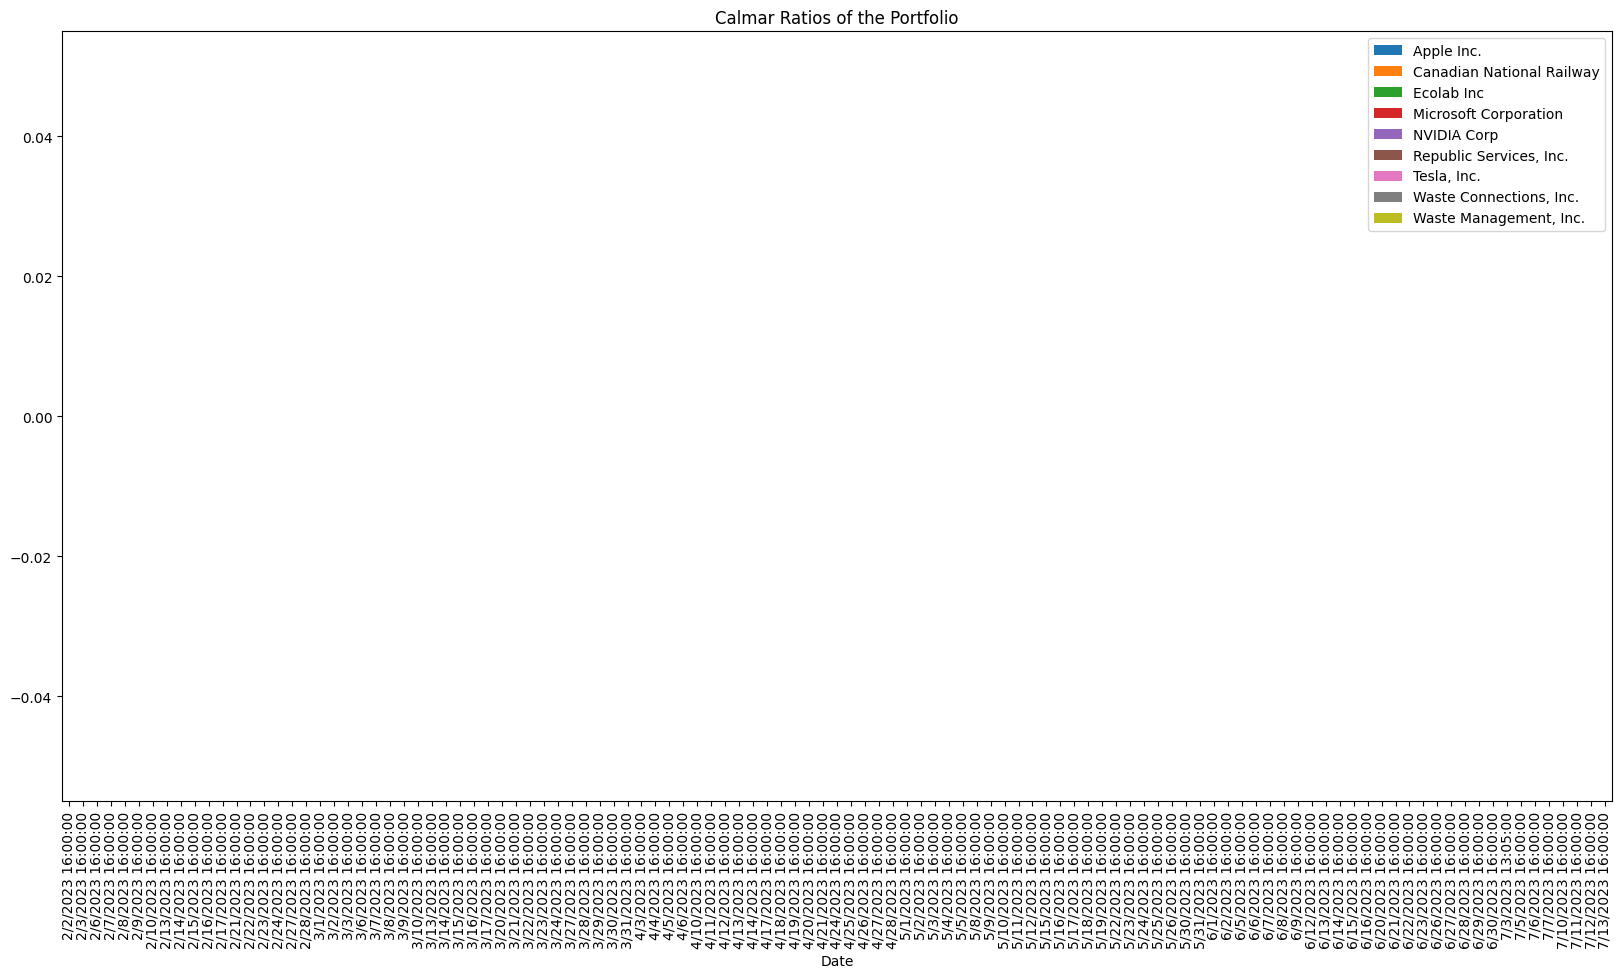

In [39]:
# Plot the calmar ratios, sortino ratios, and sharpe ratios to compare risk/reward ratios

ax = calmar_ratios.plot(kind='bar', figsize=(20,10), title='Calmar Ratios of the Portfolio')

for header in headers:
    sortino_ratios[header].plot(ax=ax, label=f"{header} sortino", legend=True, kind='line')
    sharpe_ratios[header].plot(ax=ax, label=f"{header} sharpe", legend=True, kind='line')

ax.set_xlabel('Date')
ax.set_ylabel('Ratio')

plt.show()

,Apple Inc.,Canadian National Railway,Ecolab Inc,Microsoft Corporation,NVIDIA Corp,"Republic Services, Inc.","Tesla, Inc.","Waste Connections, Inc.","Waste Management, Inc."
Date,,,,,,,,,
2/2/2023 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/3/2023 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/6/2023 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/7/2023 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/8/2023 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7/7/2023 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7/10/2023 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7/11/2023 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
